##  Packages

In [1]:
using DynamicalSystems, CairoMakie,  DifferentialEquations, OrdinaryDiffEq

In [2]:
using StaticArrays

In [3]:
function sigma(x)
    return 1.0 / ( 1.0 + exp( -10.0 * ( x  - ( - 0.25 ) ) ) )
end

function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, k1, k2, el_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - k1 * ( x1 - vs ) * sigma(x2) + el_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - k2 * ( x2 - vs ) * sigma(x1) + el_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

In [6]:
a = 1.; b = 3.; c = 1.; d = 5.;
xr = -1.6; r = 0.01; s = 5.; I = 4.; xv = 2.;
k1 = -0.4;
k2 = 0.0
el_link = 0.0

condition1 = SA[-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
condition2 = SA[-0.1, -0.1, -0.1, -0.1, -0.1, -0.1]

p = [a, b, c, d, s, xr, r, I, xv, k1, k2,  el_link]
ds_HR1 = ContinuousDynamicalSystem(HR,  condition1, p )
ds_HR2 = ContinuousDynamicalSystem(HR,  condition2, p );
ds_HR1

6-dimensional continuous dynamical system
 state:       [-1.5, 0.0, 0.0, -2.5, 0.0, 0.0]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, -0.4, 0.0, 0.0]

In [7]:
ds_HR2

6-dimensional continuous dynamical system
 state:       [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, -0.4, 0.0, 0.0]

In [9]:
tr = trajectory(ds_HR1, 100000, diffeq = (alg = AutoVern9(Rodas5()),
                                                            abstol = 1e-11, reltol = 1e-11,
                                                            maxiters = 10000000
                                                            ))

xsum = tr[:, 1] + tr[:, 4]
xsum = xsum[floor(Int, length(xsum) / 2):end ];
x1 = tr[:, 1]
y1 = tr[:, 2]
z1 = tr[:, 3];
x1 = x1[floor(Int, length(x1) / 2):end ];
y1 = y1[floor(Int, length(y1) / 2):end ];
z1 = z1[floor(Int, length(z1) / 2):end ];

In [11]:
tr1 = trajectory(ds_HR2, 100000, diffeq = (alg = AutoVern9(Rodas5()),
                                                            abstol = 1e-11, reltol = 1e-11,
                                                            maxiters = 10000000
                                                            ))

xsum1 = tr1[:, 1] + tr1[:, 4]
xsum1 = xsum1[floor(Int, length(xsum1) / 2):end ];
x11 = tr1[:, 1]
y11 = tr1[:, 2]
z11 = tr1[:, 3];
x11 = x11[floor(Int, length(x11) / 2):end ];
y11 = y11[floor(Int, length(y11) / 2):end ];
z11 = z11[floor(Int, length(z11) / 2):end ];

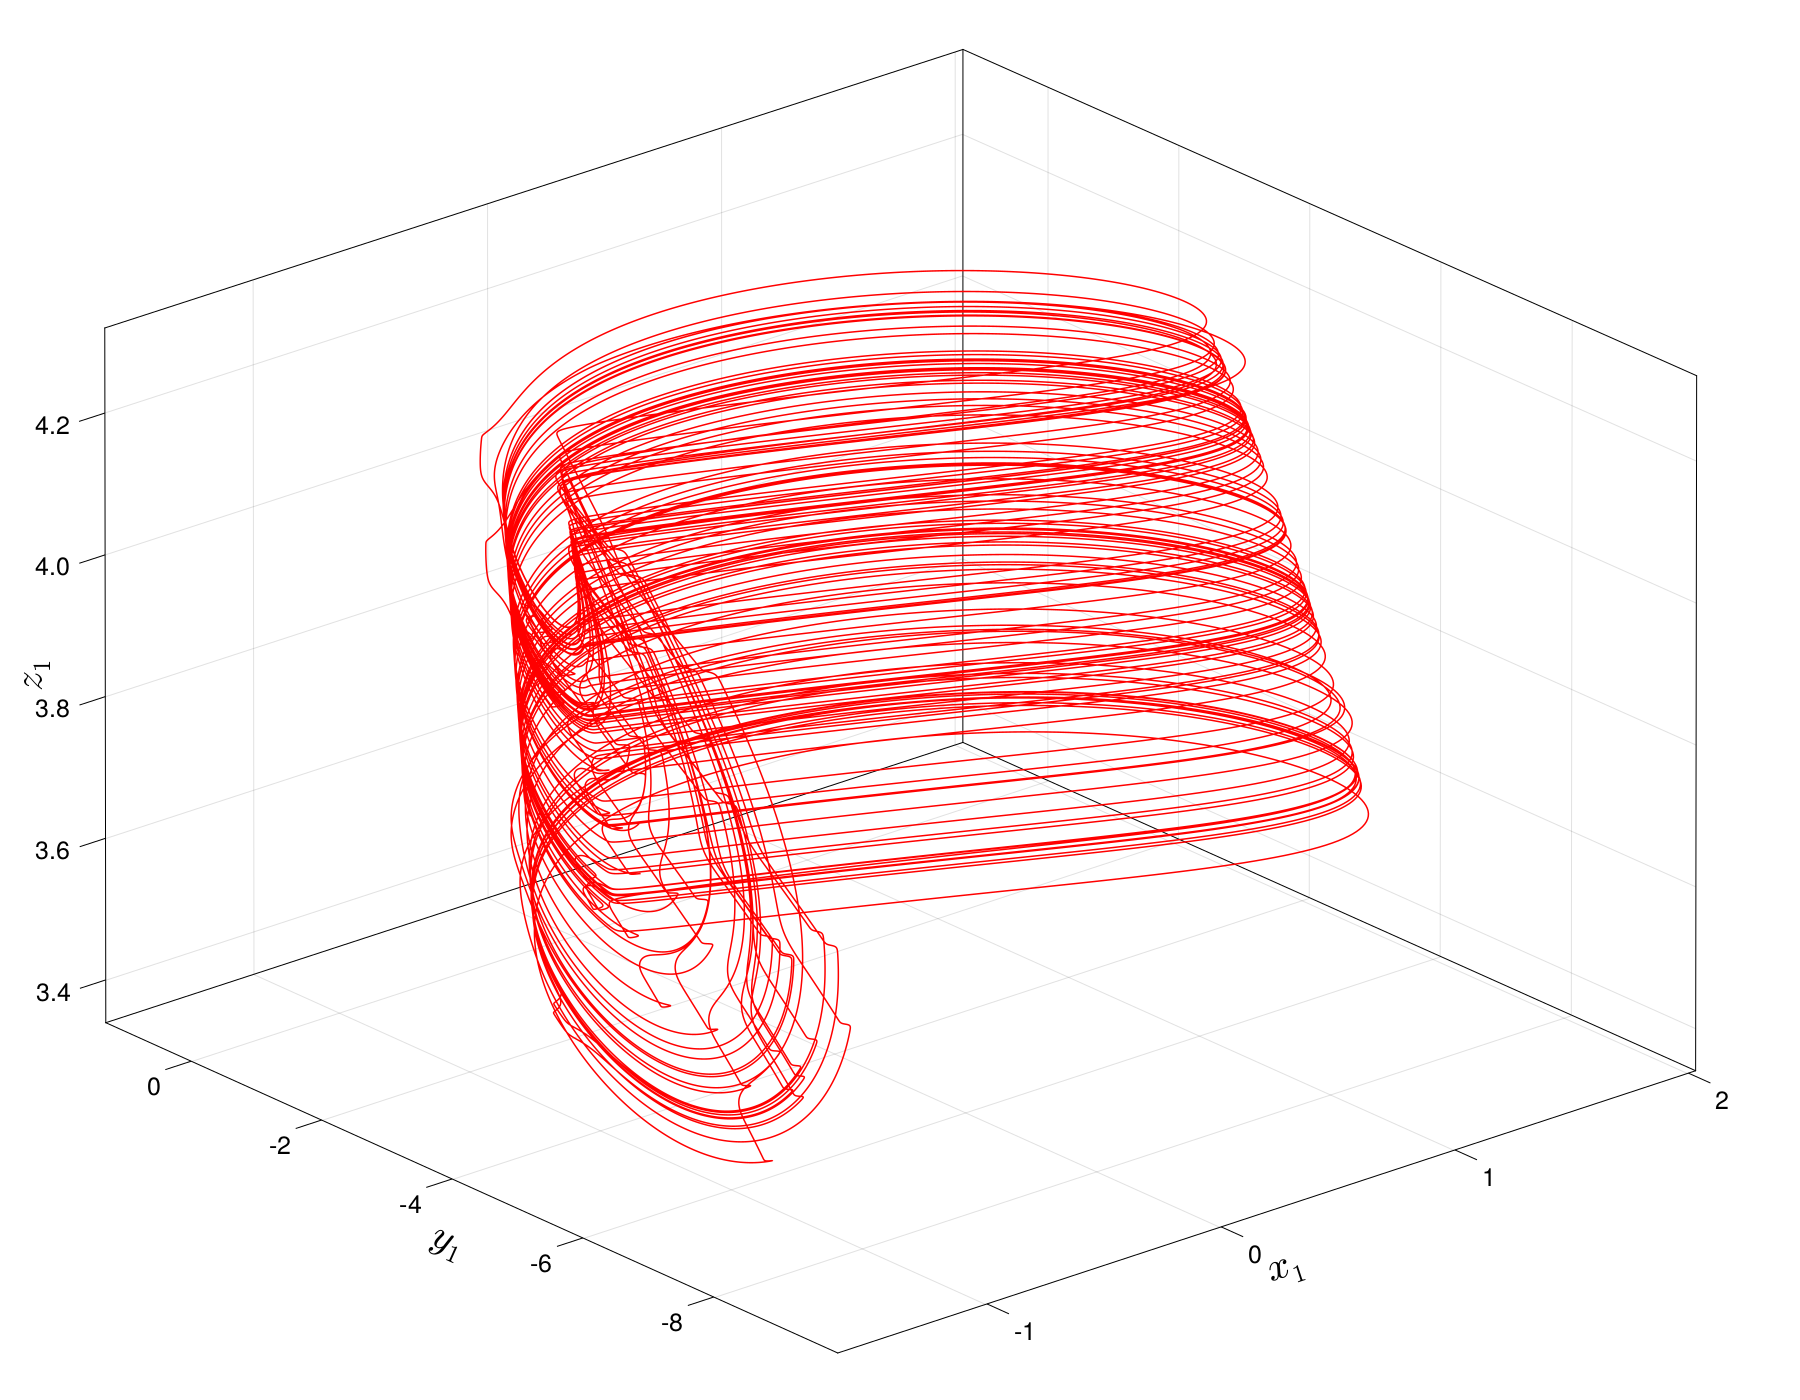

In [12]:
f = Figure(resolution = (1800, 1400))
ts, tf = 1, 200000

ax = Axis3(f[1, 1], xlabel = L"x_1", ylabel = L"y_1", zlabel = L"z_1",
xlabelsize = 40, ylabelsize = 40, zlabelsize = 40,
                xticklabelsize = 25, yticklabelsize = 25, zticklabelsize = 25  )

lines!(ax, x1[ts:tf], y1[ts:tf], z1[ts:tf], linewidth = 1.5, color = "red" )


f

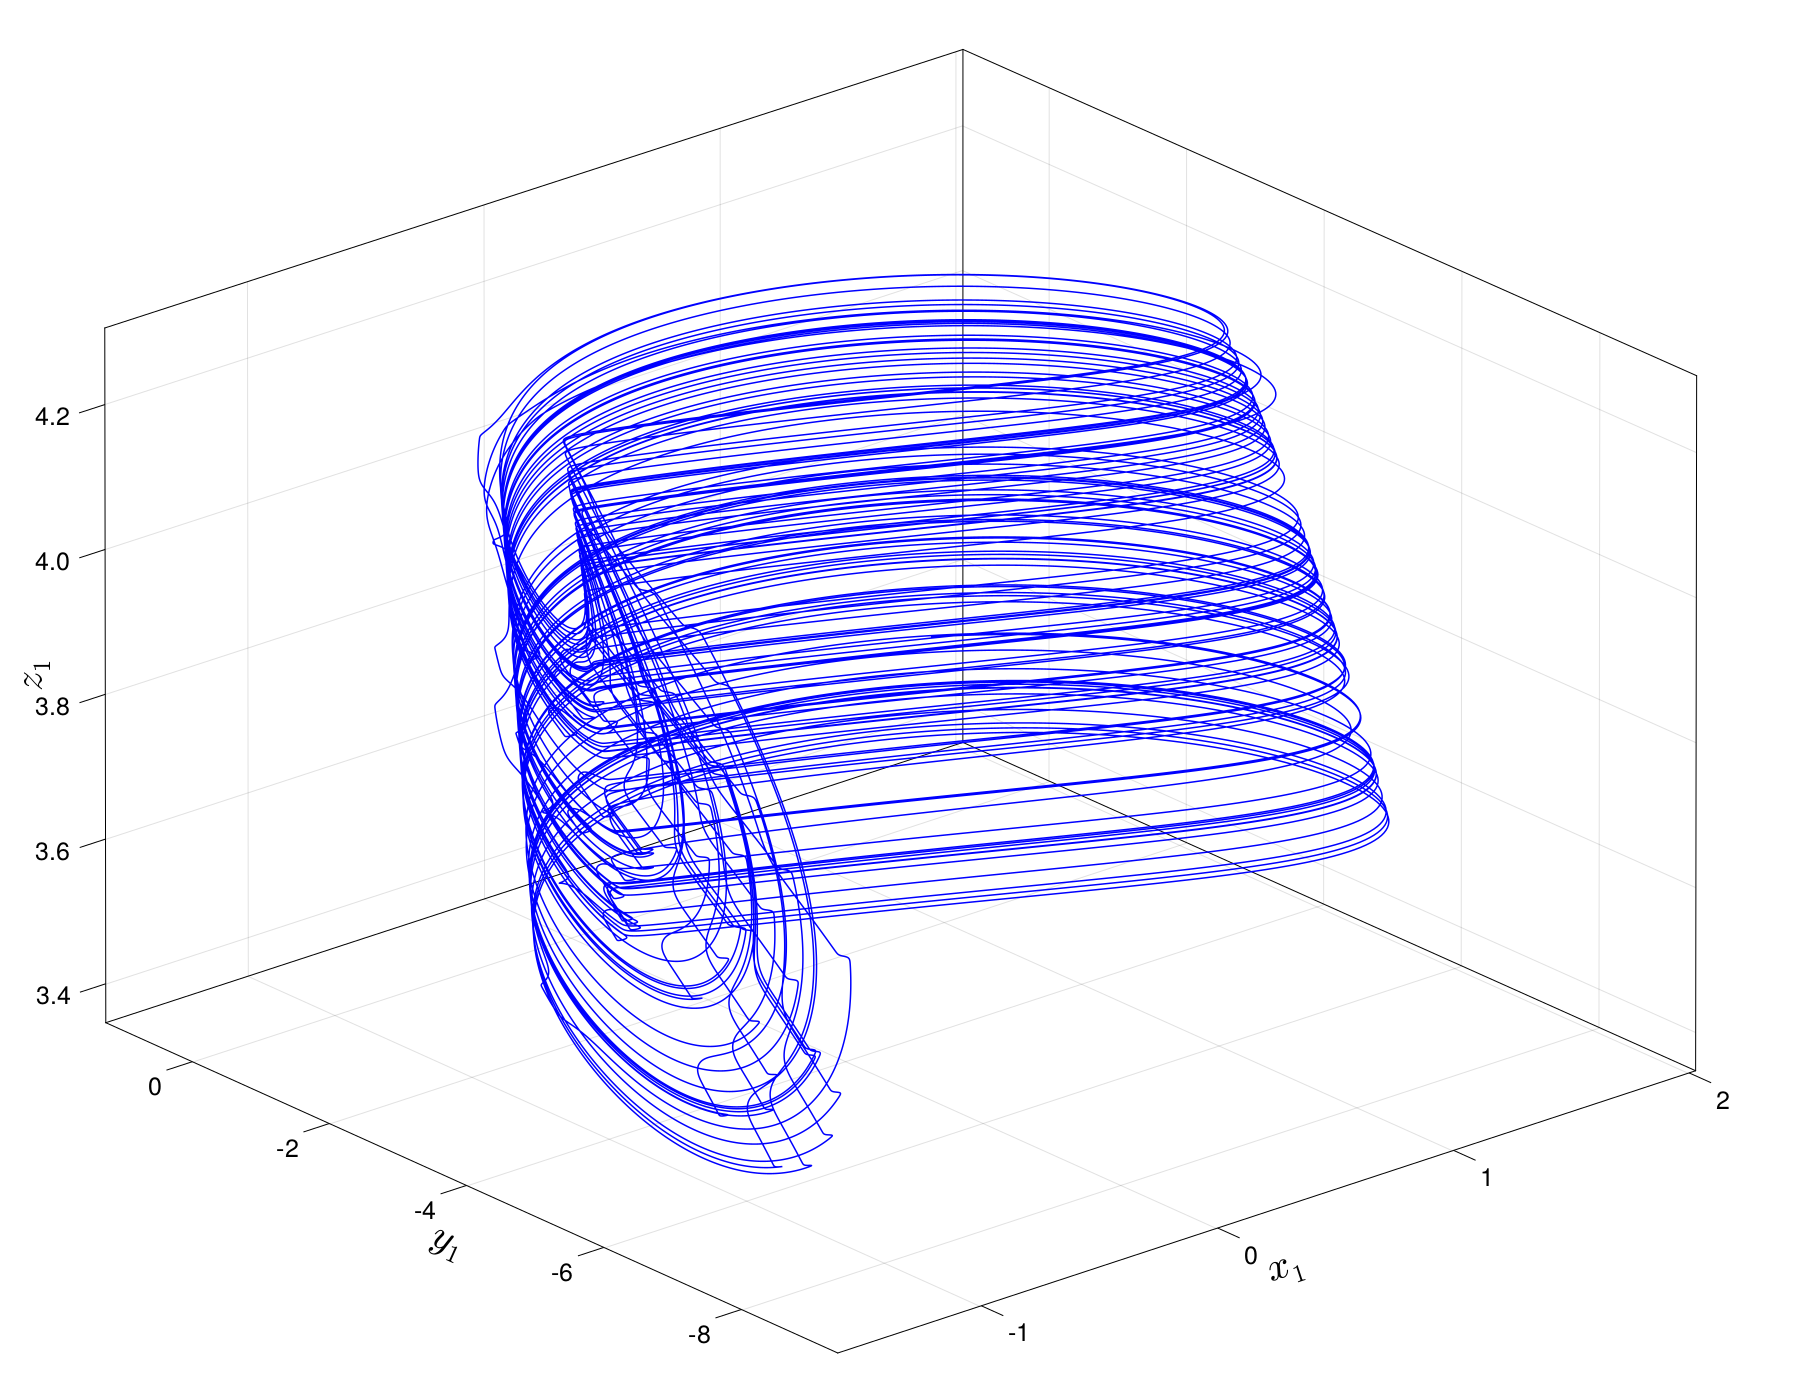

In [13]:
f = Figure(resolution = (1800, 1400))
ts, tf = 1, 200000

ax = Axis3(f[1, 1], xlabel = L"x_1", ylabel = L"y_1", zlabel = L"z_1",
xlabelsize = 40, ylabelsize = 40, zlabelsize = 40,
                xticklabelsize = 25, yticklabelsize = 25, zticklabelsize = 25  )

lines!(ax, x11[ts:tf], y11[ts:tf], z11[ts:tf], linewidth = 1.5, color = "blue" )


f

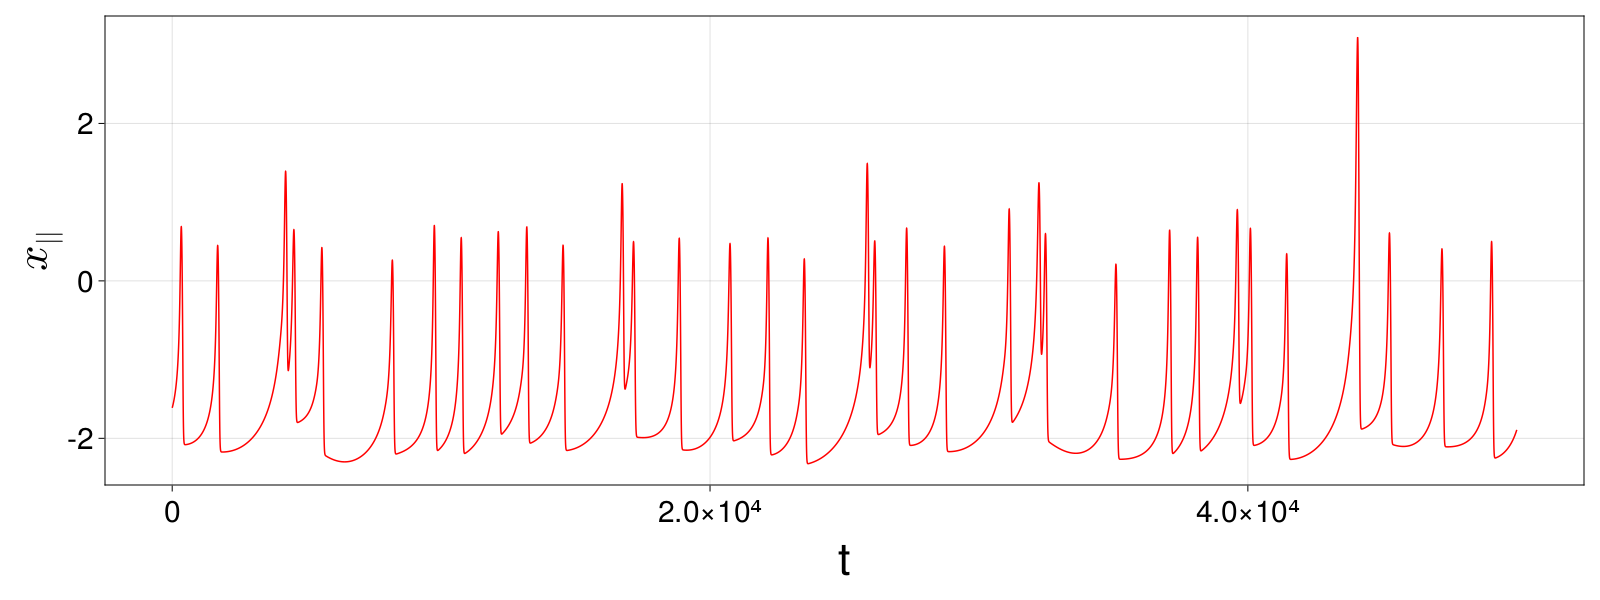

In [14]:
f = Figure(resolution = (1600, 600), fontsize = 35)
ax = Axis(f[1, 1], xlabel = "t", ylabel = L"x_{||}",
xlabelsize = 45, ylabelsize = 45, xticklabelsize = 30, yticklabelsize = 30  )
lines!(xsum[1:50000], linewidth = 1.5, color = "red" )
f

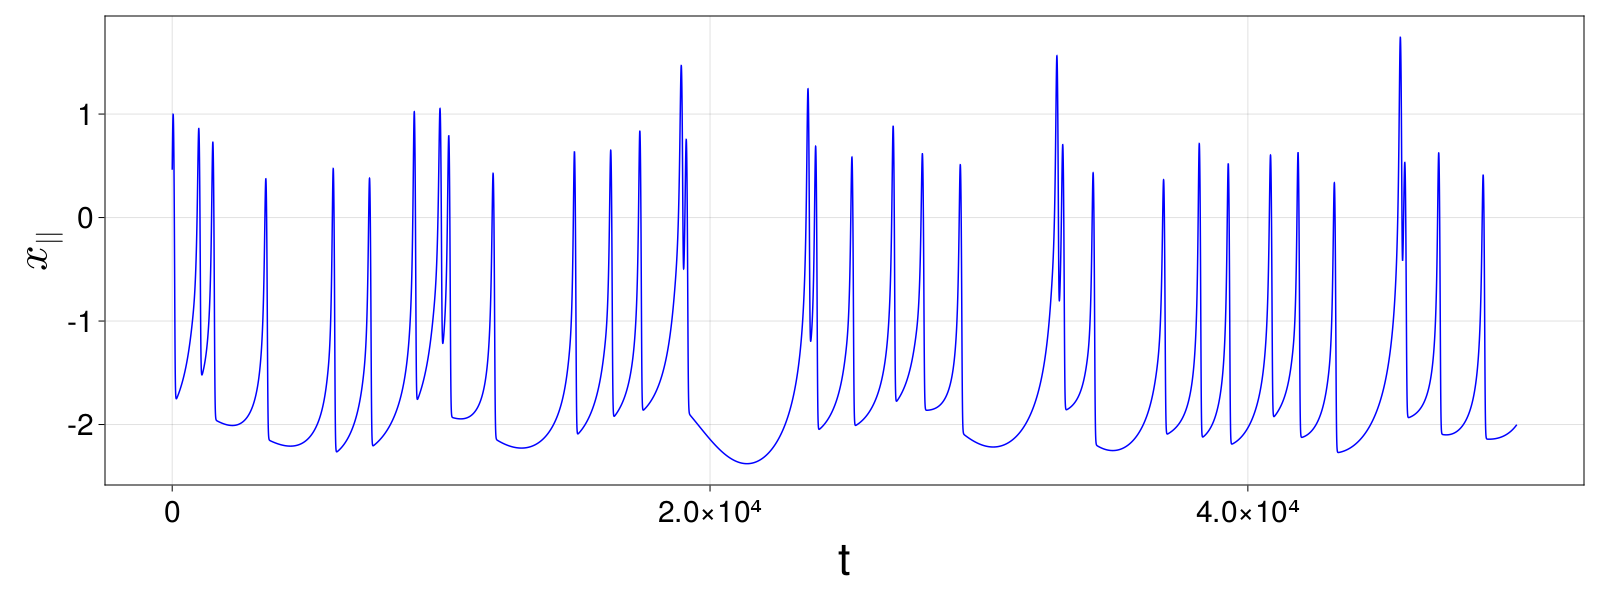

In [15]:
f = Figure(resolution = (1600, 600), fontsize = 35)
ax = Axis(f[1, 1], xlabel = "t", ylabel = L"x_{||}",
xlabelsize = 45, ylabelsize = 45, xticklabelsize = 30, yticklabelsize = 30  )
lines!(xsum1[1:50000], linewidth = 1.5, color = "blue" )
f

In [16]:
ds = ds_HR2

pvalues = range(-0.5, stop = 0.5, length = 5000)
i = 1
plane = (2, 0.0)
tf = 1000.0
tr = 5000.0
p_index = 11

11

In [17]:
output = produce_orbitdiagram(ds, plane, i, p_index, pvalues,
                              tfinal = tf, Ttr = tr, printparams = true;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000)
                                );

parameter = -0.5
parameter = -0.4997999599919984
parameter = -0.4995999199839968
parameter = -0.4993998799759952
parameter = -0.4991998399679936
parameter = -0.498999799959992
parameter = -0.4987997599519904
parameter = -0.4985997199439888
parameter = -0.4983996799359872
parameter = -0.4981996399279856
parameter = -0.497999599919984
parameter = -0.4977995599119824
parameter = -0.49759951990398077
parameter = -0.4973994798959792
parameter = -0.4971994398879776
parameter = -0.496999399879976
parameter = -0.4967993598719744
parameter = -0.4965993198639728
parameter = -0.4963992798559712
parameter = -0.4961992398479696
parameter = -0.495999199839968
parameter = -0.4957991598319664
parameter = -0.4955991198239648
parameter = -0.4953990798159632
parameter = -0.4951990398079616
parameter = -0.49499899979996
parameter = -0.49479895979195837
parameter = -0.4945989197839568
parameter = -0.4943988797759552
parameter = -0.4941988397679536
parameter = -0.493998799759952
parameter = -0.4937987597519

parameter = -0.44898979795959193
parameter = -0.4487897579515903
parameter = -0.4485897179435887
parameter = -0.4483896779355871
parameter = -0.44818963792758554
parameter = -0.4479895979195839
parameter = -0.4477895579115823
parameter = -0.4475895179035807
parameter = -0.4473894778955791
parameter = -0.44718943788757753
parameter = -0.4469893978795759
parameter = -0.4467893578715743
parameter = -0.4465893178635727
parameter = -0.4463892778555711
parameter = -0.44618923784756953
parameter = -0.4459891978395679
parameter = -0.4457891578315663
parameter = -0.4455891178235647
parameter = -0.44538907781556314
parameter = -0.4451890378075615
parameter = -0.4449889977995599
parameter = -0.4447889577915583
parameter = -0.4445889177835567
parameter = -0.44438887777555514
parameter = -0.4441888377675535
parameter = -0.4439887977595519
parameter = -0.4437887577515503
parameter = -0.4435887177435487
parameter = -0.44338867773554713
parameter = -0.4431886377275455
parameter = -0.4429885977195439
p

parameter = -0.398379675935187
parameter = -0.3981796359271854
parameter = -0.39797959591918386
parameter = -0.39777955591118225
parameter = -0.39757951590318064
parameter = -0.397379475895179
parameter = -0.3971794358871774
parameter = -0.39697939587917586
parameter = -0.39677935587117424
parameter = -0.39657931586317263
parameter = -0.396379275855171
parameter = -0.3961792358471694
parameter = -0.39597919583916785
parameter = -0.39577915583116624
parameter = -0.39557911582316463
parameter = -0.395379075815163
parameter = -0.3951790358071614
parameter = -0.39497899579915985
parameter = -0.39477895579115824
parameter = -0.3945789157831566
parameter = -0.394378875775155
parameter = -0.39417883576715346
parameter = -0.39397879575915185
parameter = -0.39377875575115023
parameter = -0.3935787157431486
parameter = -0.393378675735147
parameter = -0.39317863572714545
parameter = -0.39297859571914384
parameter = -0.39277855571114223
parameter = -0.3925785157031406
parameter = -0.39237847569513

parameter = -0.34736947389477896
parameter = -0.34716943388677735
parameter = -0.34696939387877573
parameter = -0.3467693538707742
parameter = -0.34656931386277257
parameter = -0.34636927385477095
parameter = -0.34616923384676934
parameter = -0.34596919383876773
parameter = -0.3457691538307662
parameter = -0.34556911382276456
parameter = -0.34536907381476295
parameter = -0.34516903380676134
parameter = -0.3449689937987597
parameter = -0.34476895379075817
parameter = -0.34456891378275656
parameter = -0.34436887377475495
parameter = -0.34416883376675333
parameter = -0.3439687937587517
parameter = -0.34376875375075017
parameter = -0.34356871374274855
parameter = -0.34336867373474694
parameter = -0.34316863372674533
parameter = -0.3429685937187438
parameter = -0.34276855371074216
parameter = -0.34256851370274055
parameter = -0.34236847369473894
parameter = -0.3421684336867373
parameter = -0.34196839367873577
parameter = -0.34176835367073416
parameter = -0.34156831366273255
parameter = -0.3

parameter = -0.29675935187037406
parameter = -0.2965593118623725
parameter = -0.2963592718543709
parameter = -0.2961592318463693
parameter = -0.29595919183836766
parameter = -0.29575915183036605
parameter = -0.2955591118223645
parameter = -0.2953590718143629
parameter = -0.29515903180636127
parameter = -0.29495899179835966
parameter = -0.29475895179035805
parameter = -0.2945589117823565
parameter = -0.2943588717743549
parameter = -0.29415883176635327
parameter = -0.29395879175835166
parameter = -0.29375875175035004
parameter = -0.2935587117423485
parameter = -0.2933586717343469
parameter = -0.29315863172634526
parameter = -0.29295859171834365
parameter = -0.29275855171034204
parameter = -0.2925585117023405
parameter = -0.2923584716943389
parameter = -0.29215843168633726
parameter = -0.29195839167833565
parameter = -0.2917583516703341
parameter = -0.2915583116623325
parameter = -0.29135827165433087
parameter = -0.29115823164632926
parameter = -0.29095819163832765
parameter = -0.29075815

parameter = -0.24614922984596918
parameter = -0.2459491898379676
parameter = -0.24574914982996598
parameter = -0.2455491098219644
parameter = -0.2453490698139628
parameter = -0.2451490298059612
parameter = -0.2449489897979596
parameter = -0.24474894978995798
parameter = -0.2445489097819564
parameter = -0.24434886977395479
parameter = -0.2441488297659532
parameter = -0.2439487897579516
parameter = -0.24374874974994998
parameter = -0.2435487097419484
parameter = -0.24334866973394678
parameter = -0.2431486297259452
parameter = -0.24294858971794359
parameter = -0.242748549709942
parameter = -0.2425485097019404
parameter = -0.24234846969393878
parameter = -0.2421484296859372
parameter = -0.24194838967793558
parameter = -0.241748349669934
parameter = -0.2415483096619324
parameter = -0.24134826965393077
parameter = -0.2411482296459292
parameter = -0.24094818963792758
parameter = -0.240748149629926
parameter = -0.24054810962192438
parameter = -0.24034806961392277
parameter = -0.240148029605921

parameter = -0.19613922784556911
parameter = -0.1959391878375675
parameter = -0.19573914782956592
parameter = -0.1955391078215643
parameter = -0.19533906781356272
parameter = -0.1951390278055611
parameter = -0.1949389877975595
parameter = -0.19473894778955791
parameter = -0.1945389077815563
parameter = -0.19433886777355472
parameter = -0.1941388277655531
parameter = -0.19393878775755152
parameter = -0.1937387477495499
parameter = -0.1935387077415483
parameter = -0.19333866773354672
parameter = -0.1931386277255451
parameter = -0.19293858771754352
parameter = -0.1927385477095419
parameter = -0.1925385077015403
parameter = -0.1923384676935387
parameter = -0.1921384276855371
parameter = -0.19193838767753552
parameter = -0.1917383476695339
parameter = -0.19153830766153232
parameter = -0.1913382676535307
parameter = -0.1911382276455291
parameter = -0.1909381876375275
parameter = -0.1907381476295259
parameter = -0.19053810762152432
parameter = -0.1903380676135227
parameter = -0.19013802760552

parameter = -0.14592918583716744
parameter = -0.14572914582916582
parameter = -0.14552910582116424
parameter = -0.14532906581316263
parameter = -0.14512902580516104
parameter = -0.14492898579715943
parameter = -0.14472894578915782
parameter = -0.14452890578115624
parameter = -0.14432886577315462
parameter = -0.14412882576515304
parameter = -0.14392878575715143
parameter = -0.14372874574914982
parameter = -0.14352870574114823
parameter = -0.14332866573314662
parameter = -0.14312862572514504
parameter = -0.14292858571714342
parameter = -0.14272854570914184
parameter = -0.14252850570114023
parameter = -0.14232846569313862
parameter = -0.14212842568513703
parameter = -0.14192838567713542
parameter = -0.14172834566913384
parameter = -0.14152830566113223
parameter = -0.1413282656531306
parameter = -0.14112822564512903
parameter = -0.14092818563712742
parameter = -0.14072814562912583
parameter = -0.14052810562112422
parameter = -0.14032806561312264
parameter = -0.14012802560512103
parameter =

parameter = -0.09551910382076416
parameter = -0.09531906381276255
parameter = -0.09511902380476095
parameter = -0.09491898379675935
parameter = -0.09471894378875775
parameter = -0.09451890378075616
parameter = -0.09431886377275456
parameter = -0.09411882376475295
parameter = -0.09391878375675135
parameter = -0.09371874374874975
parameter = -0.09351870374074815
parameter = -0.09331866373274655
parameter = -0.09311862372474494
parameter = -0.09291858371674334
parameter = -0.09271854370874175
parameter = -0.09251850370074015
parameter = -0.09231846369273855
parameter = -0.09211842368473695
parameter = -0.09191838367673534
parameter = -0.09171834366873374
parameter = -0.09151830366073214
parameter = -0.09131826365273055
parameter = -0.09111822364472895
parameter = -0.09091818363672735
parameter = -0.09071814362872574
parameter = -0.09051810362072414
parameter = -0.09031806361272254
parameter = -0.09011802360472095
parameter = -0.08991798359671935
parameter = -0.08971794358871775
parameter 

parameter = -0.04550910182036407
parameter = -0.045309061812362474
parameter = -0.04510902180436087
parameter = -0.04490898179635927
parameter = -0.04470894178835767
parameter = -0.04450890178035607
parameter = -0.04430886177235447
parameter = -0.04410882176435287
parameter = -0.04390878175635127
parameter = -0.04370874174834967
parameter = -0.04350870174034807
parameter = -0.043308661732346466
parameter = -0.04310862172434487
parameter = -0.04290858171634327
parameter = -0.042708541708341666
parameter = -0.04250850170034007
parameter = -0.04230846169233847
parameter = -0.042108421684336865
parameter = -0.04190838167633527
parameter = -0.04170834166833367
parameter = -0.041508301660332064
parameter = -0.041308261652330466
parameter = -0.04110822164432887
parameter = -0.040908181636327264
parameter = -0.040708141628325666
parameter = -0.04050810162032407
parameter = -0.04030806161232246
parameter = -0.040108021604320865
parameter = -0.03990798159631927
parameter = -0.03970794158831766
p

parameter = 0.0033006601320264054
parameter = 0.0035007001400280055
parameter = 0.003700740148029606
parameter = 0.003900780156031206
parameter = 0.004100820164032806
parameter = 0.004300860172034407
parameter = 0.004500900180036007
parameter = 0.004700940188037608
parameter = 0.0049009801960392075
parameter = 0.005101020204040808
parameter = 0.005301060212042409
parameter = 0.005501100220044009
parameter = 0.005701140228045609
parameter = 0.005901180236047209
parameter = 0.00610122024404881
parameter = 0.00630126025205041
parameter = 0.00650130026005201
parameter = 0.006701340268053611
parameter = 0.006901380276055211
parameter = 0.007101420284056812
parameter = 0.007301460292058411
parameter = 0.007501500300060012
parameter = 0.0077015403080616125
parameter = 0.007901580316063212
parameter = 0.008101620324064814
parameter = 0.008301660332066413
parameter = 0.008501700340068013
parameter = 0.008701740348069614
parameter = 0.008901780356071214
parameter = 0.009101820364072815
parameter

parameter = 0.053710742148429684
parameter = 0.05391078215643129
parameter = 0.05411082216443289
parameter = 0.054310862172434485
parameter = 0.05451090218043609
parameter = 0.05471094218843769
parameter = 0.054910982196439286
parameter = 0.05511102220444089
parameter = 0.05531106221244249
parameter = 0.055511102220444086
parameter = 0.05571114222844569
parameter = 0.05591118223644729
parameter = 0.05611122224444889
parameter = 0.05631126225245049
parameter = 0.05651130226045209
parameter = 0.05671134226845369
parameter = 0.05691138227645529
parameter = 0.05711142228445689
parameter = 0.05731146229245849
parameter = 0.05751150230046009
parameter = 0.05771154230846169
parameter = 0.05791158231646329
parameter = 0.058111622324464894
parameter = 0.05831166233246649
parameter = 0.0585117023404681
parameter = 0.058711742348469695
parameter = 0.05891178235647129
parameter = 0.0591118223644729
parameter = 0.059311862372474496
parameter = 0.059511902380476094
parameter = 0.0597119423884777
par

parameter = 0.10532106421284257
parameter = 0.10552110422084417
parameter = 0.10572114422884576
parameter = 0.10592118423684736
parameter = 0.10612122424484897
parameter = 0.10632126425285057
parameter = 0.10652130426085217
parameter = 0.10672134426885377
parameter = 0.10692138427685537
parameter = 0.10712142428485698
parameter = 0.10732146429285858
parameter = 0.10752150430086017
parameter = 0.10772154430886177
parameter = 0.10792158431686337
parameter = 0.10812162432486497
parameter = 0.10832166433286658
parameter = 0.10852170434086818
parameter = 0.10872174434886978
parameter = 0.10892178435687137
parameter = 0.10912182436487297
parameter = 0.10932186437287457
parameter = 0.10952190438087618
parameter = 0.10972194438887778
parameter = 0.10992198439687938
parameter = 0.11012202440488097
parameter = 0.11032206441288257
parameter = 0.11052210442088417
parameter = 0.11072214442888578
parameter = 0.11092218443688738
parameter = 0.11112222444488898
parameter = 0.11132226445289058
paramete

parameter = 0.15733146629325864
parameter = 0.15753150630126025
parameter = 0.15773154630926184
parameter = 0.15793158631726345
parameter = 0.15813162632526506
parameter = 0.15833166633326665
parameter = 0.15853170634126826
parameter = 0.15873174634926984
parameter = 0.15893178635727145
parameter = 0.15913182636527307
parameter = 0.15933186637327465
parameter = 0.15953190638127626
parameter = 0.15973194638927785
parameter = 0.15993198639727946
parameter = 0.16013202640528107
parameter = 0.16033206641328265
parameter = 0.16053210642128427
parameter = 0.16073214642928585
parameter = 0.16093218643728746
parameter = 0.16113222644528905
parameter = 0.16133226645329066
parameter = 0.16153230646129227
parameter = 0.16173234646929385
parameter = 0.16193238647729546
parameter = 0.16213242648529705
parameter = 0.16233246649329866
parameter = 0.16253250650130027
parameter = 0.16273254650930186
parameter = 0.16293258651730347
parameter = 0.16313262652530505
parameter = 0.16333266653330666
paramete

parameter = 0.20914182836567313
parameter = 0.20934186837367474
parameter = 0.20954190838167633
parameter = 0.20974194838967794
parameter = 0.20994198839767952
parameter = 0.21014202840568114
parameter = 0.21034206841368275
parameter = 0.21054210842168433
parameter = 0.21074214842968594
parameter = 0.21094218843768753
parameter = 0.21114222844568914
parameter = 0.21134226845369075
parameter = 0.21154230846169234
parameter = 0.21174234846969395
parameter = 0.21194238847769553
parameter = 0.21214242848569714
parameter = 0.21234246849369873
parameter = 0.21254250850170034
parameter = 0.21274254850970195
parameter = 0.21294258851770353
parameter = 0.21314262852570515
parameter = 0.21334266853370673
parameter = 0.21354270854170834
parameter = 0.21374274854970995
parameter = 0.21394278855771154
parameter = 0.21414282856571315
parameter = 0.21434286857371473
parameter = 0.21454290858171635
parameter = 0.21474294858971793
parameter = 0.21494298859771954
parameter = 0.21514302860572115
paramete

parameter = 0.2611522304460892
parameter = 0.2613522704540908
parameter = 0.26155231046209243
parameter = 0.26175235047009404
parameter = 0.2619523904780956
parameter = 0.2621524304860972
parameter = 0.2623524704940988
parameter = 0.26255251050210043
parameter = 0.26275255051010205
parameter = 0.2629525905181036
parameter = 0.2631526305261052
parameter = 0.2633526705341068
parameter = 0.26355271054210844
parameter = 0.26375275055011005
parameter = 0.2639527905581116
parameter = 0.2641528305661132
parameter = 0.26435287057411483
parameter = 0.26455291058211644
parameter = 0.264752950590118
parameter = 0.2649529905981196
parameter = 0.2651530306061212
parameter = 0.26535307061412283
parameter = 0.26555311062212444
parameter = 0.265753150630126
parameter = 0.2659531906381276
parameter = 0.2661532306461292
parameter = 0.26635327065413084
parameter = 0.26655331066213245
parameter = 0.266753350670134
parameter = 0.2669533906781356
parameter = 0.2671534306861372
parameter = 0.2673534706941388

parameter = 0.3133626725345069
parameter = 0.3135627125425085
parameter = 0.3137627525505101
parameter = 0.3139627925585117
parameter = 0.3141628325665133
parameter = 0.3143628725745149
parameter = 0.3145629125825165
parameter = 0.3147629525905181
parameter = 0.31496299259851973
parameter = 0.3151630326065213
parameter = 0.3153630726145229
parameter = 0.3155631126225245
parameter = 0.3157631526305261
parameter = 0.3159631926385277
parameter = 0.3161632326465293
parameter = 0.3163632726545309
parameter = 0.3165633126625325
parameter = 0.3167633526705341
parameter = 0.3169633926785357
parameter = 0.3171634326865373
parameter = 0.3173634726945389
parameter = 0.3175635127025405
parameter = 0.31776355271054213
parameter = 0.3179635927185437
parameter = 0.3181636327265453
parameter = 0.3183636727345469
parameter = 0.3185637127425485
parameter = 0.31876375275055013
parameter = 0.3189637927585517
parameter = 0.3191638327665533
parameter = 0.3193638727745549
parameter = 0.3195639127825565
param

parameter = 0.3655731146229246
parameter = 0.3657731546309262
parameter = 0.3659731946389278
parameter = 0.3661732346469294
parameter = 0.36637327465493097
parameter = 0.3665733146629326
parameter = 0.3667733546709342
parameter = 0.3669733946789358
parameter = 0.36717343468693736
parameter = 0.367373474694939
parameter = 0.3675735147029406
parameter = 0.3677735547109422
parameter = 0.3679735947189438
parameter = 0.36817363472694536
parameter = 0.368373674734947
parameter = 0.3685737147429486
parameter = 0.3687737547509502
parameter = 0.3689737947589518
parameter = 0.36917383476695337
parameter = 0.369373874774955
parameter = 0.3695739147829566
parameter = 0.3697739547909582
parameter = 0.3699739947989598
parameter = 0.37017403480696137
parameter = 0.370374074814963
parameter = 0.3705741148229646
parameter = 0.3707741548309662
parameter = 0.3709741948389678
parameter = 0.3711742348469694
parameter = 0.371374274854971
parameter = 0.3715743148629726
parameter = 0.3717743548709742
paramete

parameter = 0.4179835967193439
parameter = 0.4181836367273455
parameter = 0.41838367673534704
parameter = 0.41858371674334865
parameter = 0.41878375675135027
parameter = 0.4189837967593519
parameter = 0.4191838367673535
parameter = 0.41938387677535505
parameter = 0.41958391678335666
parameter = 0.41978395679135827
parameter = 0.4199839967993599
parameter = 0.4201840368073615
parameter = 0.42038407681536305
parameter = 0.42058411682336466
parameter = 0.4207841568313663
parameter = 0.4209841968393679
parameter = 0.4211842368473695
parameter = 0.42138427685537105
parameter = 0.42158431686337267
parameter = 0.4217843568713743
parameter = 0.4219843968793759
parameter = 0.4221844368873775
parameter = 0.42238447689537906
parameter = 0.42258451690338067
parameter = 0.4227845569113823
parameter = 0.4229845969193839
parameter = 0.4231846369273855
parameter = 0.42338467693538706
parameter = 0.4235847169433887
parameter = 0.4237847569513903
parameter = 0.4239847969593919
parameter = 0.424184836967

parameter = 0.4703940788157632
parameter = 0.47059411882376473
parameter = 0.47079415883176634
parameter = 0.47099419883976795
parameter = 0.47119423884776956
parameter = 0.4713942788557712
parameter = 0.47159431886377273
parameter = 0.47179435887177434
parameter = 0.47199439887977596
parameter = 0.47219443888777757
parameter = 0.4723944788957792
parameter = 0.47259451890378074
parameter = 0.47279455891178235
parameter = 0.47299459891978396
parameter = 0.47319463892778557
parameter = 0.4733946789357872
parameter = 0.47359471894378874
parameter = 0.47379475895179035
parameter = 0.47399479895979196
parameter = 0.4741948389677936
parameter = 0.4743948789757952
parameter = 0.47459491898379674
parameter = 0.47479495899179835
parameter = 0.47499499899979997
parameter = 0.4751950390078016
parameter = 0.47539507901580313
parameter = 0.47559511902380475
parameter = 0.47579515903180636
parameter = 0.47599519903980797
parameter = 0.4761952390478096
parameter = 0.47639527905581114
parameter = 0.47

In [18]:
ds = ds_HR2

pvalues = range(-0.5, stop = 0.5, length = 5000)
i = 4
plane = (2, 0.0)
tf = 1000.0
tr = 5000.0
p_index = 11

output1 = produce_orbitdiagram(ds, plane, i, p_index, pvalues,
                              tfinal = tf, Ttr = tr, printparams = true;
                              diffeq = (alg = AutoVern9(Rodas5()), abstol = 1e-11, reltol = 1e-11,  maxiters = 10000000)
                                );

parameter = -0.5
parameter = -0.4997999599919984
parameter = -0.4995999199839968
parameter = -0.4993998799759952
parameter = -0.4991998399679936
parameter = -0.498999799959992
parameter = -0.4987997599519904
parameter = -0.4985997199439888
parameter = -0.4983996799359872
parameter = -0.4981996399279856
parameter = -0.497999599919984
parameter = -0.4977995599119824
parameter = -0.49759951990398077
parameter = -0.4973994798959792
parameter = -0.4971994398879776
parameter = -0.496999399879976
parameter = -0.4967993598719744
parameter = -0.4965993198639728
parameter = -0.4963992798559712
parameter = -0.4961992398479696
parameter = -0.495999199839968
parameter = -0.4957991598319664
parameter = -0.4955991198239648
parameter = -0.4953990798159632
parameter = -0.4951990398079616
parameter = -0.49499899979996
parameter = -0.49479895979195837
parameter = -0.4945989197839568
parameter = -0.4943988797759552
parameter = -0.4941988397679536
parameter = -0.493998799759952
parameter = -0.4937987597519

parameter = -0.44898979795959193
parameter = -0.4487897579515903
parameter = -0.4485897179435887
parameter = -0.4483896779355871
parameter = -0.44818963792758554
parameter = -0.4479895979195839
parameter = -0.4477895579115823
parameter = -0.4475895179035807
parameter = -0.4473894778955791
parameter = -0.44718943788757753
parameter = -0.4469893978795759
parameter = -0.4467893578715743
parameter = -0.4465893178635727
parameter = -0.4463892778555711
parameter = -0.44618923784756953
parameter = -0.4459891978395679
parameter = -0.4457891578315663
parameter = -0.4455891178235647
parameter = -0.44538907781556314
parameter = -0.4451890378075615
parameter = -0.4449889977995599
parameter = -0.4447889577915583
parameter = -0.4445889177835567
parameter = -0.44438887777555514
parameter = -0.4441888377675535
parameter = -0.4439887977595519
parameter = -0.4437887577515503
parameter = -0.4435887177435487
parameter = -0.44338867773554713
parameter = -0.4431886377275455
parameter = -0.4429885977195439
p

parameter = -0.398379675935187
parameter = -0.3981796359271854
parameter = -0.39797959591918386
parameter = -0.39777955591118225
parameter = -0.39757951590318064
parameter = -0.397379475895179
parameter = -0.3971794358871774
parameter = -0.39697939587917586
parameter = -0.39677935587117424
parameter = -0.39657931586317263
parameter = -0.396379275855171
parameter = -0.3961792358471694
parameter = -0.39597919583916785
parameter = -0.39577915583116624
parameter = -0.39557911582316463
parameter = -0.395379075815163
parameter = -0.3951790358071614
parameter = -0.39497899579915985
parameter = -0.39477895579115824
parameter = -0.3945789157831566
parameter = -0.394378875775155
parameter = -0.39417883576715346
parameter = -0.39397879575915185
parameter = -0.39377875575115023
parameter = -0.3935787157431486
parameter = -0.393378675735147
parameter = -0.39317863572714545
parameter = -0.39297859571914384
parameter = -0.39277855571114223
parameter = -0.3925785157031406
parameter = -0.39237847569513

parameter = -0.34736947389477896
parameter = -0.34716943388677735
parameter = -0.34696939387877573
parameter = -0.3467693538707742
parameter = -0.34656931386277257
parameter = -0.34636927385477095
parameter = -0.34616923384676934
parameter = -0.34596919383876773
parameter = -0.3457691538307662
parameter = -0.34556911382276456
parameter = -0.34536907381476295
parameter = -0.34516903380676134
parameter = -0.3449689937987597
parameter = -0.34476895379075817
parameter = -0.34456891378275656
parameter = -0.34436887377475495
parameter = -0.34416883376675333
parameter = -0.3439687937587517
parameter = -0.34376875375075017
parameter = -0.34356871374274855
parameter = -0.34336867373474694
parameter = -0.34316863372674533
parameter = -0.3429685937187438
parameter = -0.34276855371074216
parameter = -0.34256851370274055
parameter = -0.34236847369473894
parameter = -0.3421684336867373
parameter = -0.34196839367873577
parameter = -0.34176835367073416
parameter = -0.34156831366273255
parameter = -0.3

parameter = -0.2965593118623725
parameter = -0.2963592718543709
parameter = -0.2961592318463693
parameter = -0.29595919183836766
parameter = -0.29575915183036605
parameter = -0.2955591118223645
parameter = -0.2953590718143629
parameter = -0.29515903180636127
parameter = -0.29495899179835966
parameter = -0.29475895179035805
parameter = -0.2945589117823565
parameter = -0.2943588717743549
parameter = -0.29415883176635327
parameter = -0.29395879175835166
parameter = -0.29375875175035004
parameter = -0.2935587117423485
parameter = -0.2933586717343469
parameter = -0.29315863172634526
parameter = -0.29295859171834365
parameter = -0.29275855171034204
parameter = -0.2925585117023405
parameter = -0.2923584716943389
parameter = -0.29215843168633726
parameter = -0.29195839167833565
parameter = -0.2917583516703341
parameter = -0.2915583116623325
parameter = -0.29135827165433087
parameter = -0.29115823164632926
parameter = -0.29095819163832765
parameter = -0.2907581516303261
parameter = -0.290558111

parameter = -0.2459491898379676
parameter = -0.24574914982996598
parameter = -0.2455491098219644
parameter = -0.2453490698139628
parameter = -0.2451490298059612
parameter = -0.2449489897979596
parameter = -0.24474894978995798
parameter = -0.2445489097819564
parameter = -0.24434886977395479
parameter = -0.2441488297659532
parameter = -0.2439487897579516
parameter = -0.24374874974994998
parameter = -0.2435487097419484
parameter = -0.24334866973394678
parameter = -0.2431486297259452
parameter = -0.24294858971794359
parameter = -0.242748549709942
parameter = -0.2425485097019404
parameter = -0.24234846969393878
parameter = -0.2421484296859372
parameter = -0.24194838967793558
parameter = -0.241748349669934
parameter = -0.2415483096619324
parameter = -0.24134826965393077
parameter = -0.2411482296459292
parameter = -0.24094818963792758
parameter = -0.240748149629926
parameter = -0.24054810962192438
parameter = -0.24034806961392277
parameter = -0.2401480296059212
parameter = -0.2399479895979195

parameter = -0.19573914782956592
parameter = -0.1955391078215643
parameter = -0.19533906781356272
parameter = -0.1951390278055611
parameter = -0.1949389877975595
parameter = -0.19473894778955791
parameter = -0.1945389077815563
parameter = -0.19433886777355472
parameter = -0.1941388277655531
parameter = -0.19393878775755152
parameter = -0.1937387477495499
parameter = -0.1935387077415483
parameter = -0.19333866773354672
parameter = -0.1931386277255451
parameter = -0.19293858771754352
parameter = -0.1927385477095419
parameter = -0.1925385077015403
parameter = -0.1923384676935387
parameter = -0.1921384276855371
parameter = -0.19193838767753552
parameter = -0.1917383476695339
parameter = -0.19153830766153232
parameter = -0.1913382676535307
parameter = -0.1911382276455291
parameter = -0.1909381876375275
parameter = -0.1907381476295259
parameter = -0.19053810762152432
parameter = -0.1903380676135227
parameter = -0.1901380276055211
parameter = -0.1899379875975195
parameter = -0.189737947589517

parameter = -0.14552910582116424
parameter = -0.14532906581316263
parameter = -0.14512902580516104
parameter = -0.14492898579715943
parameter = -0.14472894578915782
parameter = -0.14452890578115624
parameter = -0.14432886577315462
parameter = -0.14412882576515304
parameter = -0.14392878575715143
parameter = -0.14372874574914982
parameter = -0.14352870574114823
parameter = -0.14332866573314662
parameter = -0.14312862572514504
parameter = -0.14292858571714342
parameter = -0.14272854570914184
parameter = -0.14252850570114023
parameter = -0.14232846569313862
parameter = -0.14212842568513703
parameter = -0.14192838567713542
parameter = -0.14172834566913384
parameter = -0.14152830566113223
parameter = -0.1413282656531306
parameter = -0.14112822564512903
parameter = -0.14092818563712742
parameter = -0.14072814562912583
parameter = -0.14052810562112422
parameter = -0.14032806561312264
parameter = -0.14012802560512103
parameter = -0.13992798559711941
parameter = -0.13972794558911783
parameter =

parameter = -0.09531906381276255
parameter = -0.09511902380476095
parameter = -0.09491898379675935
parameter = -0.09471894378875775
parameter = -0.09451890378075616
parameter = -0.09431886377275456
parameter = -0.09411882376475295
parameter = -0.09391878375675135
parameter = -0.09371874374874975
parameter = -0.09351870374074815
parameter = -0.09331866373274655
parameter = -0.09311862372474494
parameter = -0.09291858371674334
parameter = -0.09271854370874175
parameter = -0.09251850370074015
parameter = -0.09231846369273855
parameter = -0.09211842368473695
parameter = -0.09191838367673534
parameter = -0.09171834366873374
parameter = -0.09151830366073214
parameter = -0.09131826365273055
parameter = -0.09111822364472895
parameter = -0.09091818363672735
parameter = -0.09071814362872574
parameter = -0.09051810362072414
parameter = -0.09031806361272254
parameter = -0.09011802360472095
parameter = -0.08991798359671935
parameter = -0.08971794358871775
parameter = -0.08951790358071614
parameter 

parameter = -0.045309061812362474
parameter = -0.04510902180436087
parameter = -0.04490898179635927
parameter = -0.04470894178835767
parameter = -0.04450890178035607
parameter = -0.04430886177235447
parameter = -0.04410882176435287
parameter = -0.04390878175635127
parameter = -0.04370874174834967
parameter = -0.04350870174034807
parameter = -0.043308661732346466
parameter = -0.04310862172434487
parameter = -0.04290858171634327
parameter = -0.042708541708341666
parameter = -0.04250850170034007
parameter = -0.04230846169233847
parameter = -0.042108421684336865
parameter = -0.04190838167633527
parameter = -0.04170834166833367
parameter = -0.041508301660332064
parameter = -0.041308261652330466
parameter = -0.04110822164432887
parameter = -0.040908181636327264
parameter = -0.040708141628325666
parameter = -0.04050810162032407
parameter = -0.04030806161232246
parameter = -0.040108021604320865
parameter = -0.03990798159631927
parameter = -0.03970794158831766
parameter = -0.039507901580316064


parameter = 0.0033006601320264054
parameter = 0.0035007001400280055
parameter = 0.003700740148029606
parameter = 0.003900780156031206
parameter = 0.004100820164032806
parameter = 0.004300860172034407
parameter = 0.004500900180036007
parameter = 0.004700940188037608
parameter = 0.0049009801960392075
parameter = 0.005101020204040808
parameter = 0.005301060212042409
parameter = 0.005501100220044009
parameter = 0.005701140228045609
parameter = 0.005901180236047209
parameter = 0.00610122024404881
parameter = 0.00630126025205041
parameter = 0.00650130026005201
parameter = 0.006701340268053611
parameter = 0.006901380276055211
parameter = 0.007101420284056812
parameter = 0.007301460292058411
parameter = 0.007501500300060012
parameter = 0.0077015403080616125
parameter = 0.007901580316063212
parameter = 0.008101620324064814
parameter = 0.008301660332066413
parameter = 0.008501700340068013
parameter = 0.008701740348069614
parameter = 0.008901780356071214
parameter = 0.009101820364072815
parameter

parameter = 0.053710742148429684
parameter = 0.05391078215643129
parameter = 0.05411082216443289
parameter = 0.054310862172434485
parameter = 0.05451090218043609
parameter = 0.05471094218843769
parameter = 0.054910982196439286
parameter = 0.05511102220444089
parameter = 0.05531106221244249
parameter = 0.055511102220444086
parameter = 0.05571114222844569
parameter = 0.05591118223644729
parameter = 0.05611122224444889
parameter = 0.05631126225245049
parameter = 0.05651130226045209
parameter = 0.05671134226845369
parameter = 0.05691138227645529
parameter = 0.05711142228445689
parameter = 0.05731146229245849
parameter = 0.05751150230046009
parameter = 0.05771154230846169
parameter = 0.05791158231646329
parameter = 0.058111622324464894
parameter = 0.05831166233246649
parameter = 0.0585117023404681
parameter = 0.058711742348469695
parameter = 0.05891178235647129
parameter = 0.0591118223644729
parameter = 0.059311862372474496
parameter = 0.059511902380476094
parameter = 0.0597119423884777
par

parameter = 0.10552110422084417
parameter = 0.10572114422884576
parameter = 0.10592118423684736
parameter = 0.10612122424484897
parameter = 0.10632126425285057
parameter = 0.10652130426085217
parameter = 0.10672134426885377
parameter = 0.10692138427685537
parameter = 0.10712142428485698
parameter = 0.10732146429285858
parameter = 0.10752150430086017
parameter = 0.10772154430886177
parameter = 0.10792158431686337
parameter = 0.10812162432486497
parameter = 0.10832166433286658
parameter = 0.10852170434086818
parameter = 0.10872174434886978
parameter = 0.10892178435687137
parameter = 0.10912182436487297
parameter = 0.10932186437287457
parameter = 0.10952190438087618
parameter = 0.10972194438887778
parameter = 0.10992198439687938
parameter = 0.11012202440488097
parameter = 0.11032206441288257
parameter = 0.11052210442088417
parameter = 0.11072214442888578
parameter = 0.11092218443688738
parameter = 0.11112222444488898
parameter = 0.11132226445289058
parameter = 0.11152230446089217
paramete

parameter = 0.15733146629325864
parameter = 0.15753150630126025
parameter = 0.15773154630926184
parameter = 0.15793158631726345
parameter = 0.15813162632526506
parameter = 0.15833166633326665
parameter = 0.15853170634126826
parameter = 0.15873174634926984
parameter = 0.15893178635727145
parameter = 0.15913182636527307
parameter = 0.15933186637327465
parameter = 0.15953190638127626
parameter = 0.15973194638927785
parameter = 0.15993198639727946
parameter = 0.16013202640528107
parameter = 0.16033206641328265
parameter = 0.16053210642128427
parameter = 0.16073214642928585
parameter = 0.16093218643728746
parameter = 0.16113222644528905
parameter = 0.16133226645329066
parameter = 0.16153230646129227
parameter = 0.16173234646929385
parameter = 0.16193238647729546
parameter = 0.16213242648529705
parameter = 0.16233246649329866
parameter = 0.16253250650130027
parameter = 0.16273254650930186
parameter = 0.16293258651730347
parameter = 0.16313262652530505
parameter = 0.16333266653330666
paramete

parameter = 0.20914182836567313
parameter = 0.20934186837367474
parameter = 0.20954190838167633
parameter = 0.20974194838967794
parameter = 0.20994198839767952
parameter = 0.21014202840568114
parameter = 0.21034206841368275
parameter = 0.21054210842168433
parameter = 0.21074214842968594
parameter = 0.21094218843768753
parameter = 0.21114222844568914
parameter = 0.21134226845369075
parameter = 0.21154230846169234
parameter = 0.21174234846969395
parameter = 0.21194238847769553
parameter = 0.21214242848569714
parameter = 0.21234246849369873
parameter = 0.21254250850170034
parameter = 0.21274254850970195
parameter = 0.21294258851770353
parameter = 0.21314262852570515
parameter = 0.21334266853370673
parameter = 0.21354270854170834
parameter = 0.21374274854970995
parameter = 0.21394278855771154
parameter = 0.21414282856571315
parameter = 0.21434286857371473
parameter = 0.21454290858171635
parameter = 0.21474294858971793
parameter = 0.21494298859771954
parameter = 0.21514302860572115
paramete

parameter = 0.2611522304460892
parameter = 0.2613522704540908
parameter = 0.26155231046209243
parameter = 0.26175235047009404
parameter = 0.2619523904780956
parameter = 0.2621524304860972
parameter = 0.2623524704940988
parameter = 0.26255251050210043
parameter = 0.26275255051010205
parameter = 0.2629525905181036
parameter = 0.2631526305261052
parameter = 0.2633526705341068
parameter = 0.26355271054210844
parameter = 0.26375275055011005
parameter = 0.2639527905581116
parameter = 0.2641528305661132
parameter = 0.26435287057411483
parameter = 0.26455291058211644
parameter = 0.264752950590118
parameter = 0.2649529905981196
parameter = 0.2651530306061212
parameter = 0.26535307061412283
parameter = 0.26555311062212444
parameter = 0.265753150630126
parameter = 0.2659531906381276
parameter = 0.2661532306461292
parameter = 0.26635327065413084
parameter = 0.26655331066213245
parameter = 0.266753350670134
parameter = 0.2669533906781356
parameter = 0.2671534306861372
parameter = 0.2673534706941388

parameter = 0.3135627125425085
parameter = 0.3137627525505101
parameter = 0.3139627925585117
parameter = 0.3141628325665133
parameter = 0.3143628725745149
parameter = 0.3145629125825165
parameter = 0.3147629525905181
parameter = 0.31496299259851973
parameter = 0.3151630326065213
parameter = 0.3153630726145229
parameter = 0.3155631126225245
parameter = 0.3157631526305261
parameter = 0.3159631926385277
parameter = 0.3161632326465293
parameter = 0.3163632726545309
parameter = 0.3165633126625325
parameter = 0.3167633526705341
parameter = 0.3169633926785357
parameter = 0.3171634326865373
parameter = 0.3173634726945389
parameter = 0.3175635127025405
parameter = 0.31776355271054213
parameter = 0.3179635927185437
parameter = 0.3181636327265453
parameter = 0.3183636727345469
parameter = 0.3185637127425485
parameter = 0.31876375275055013
parameter = 0.3189637927585517
parameter = 0.3191638327665533
parameter = 0.3193638727745549
parameter = 0.3195639127825565
parameter = 0.31976395279055814
para

parameter = 0.3659731946389278
parameter = 0.3661732346469294
parameter = 0.36637327465493097
parameter = 0.3665733146629326
parameter = 0.3667733546709342
parameter = 0.3669733946789358
parameter = 0.36717343468693736
parameter = 0.367373474694939
parameter = 0.3675735147029406
parameter = 0.3677735547109422
parameter = 0.3679735947189438
parameter = 0.36817363472694536
parameter = 0.368373674734947
parameter = 0.3685737147429486
parameter = 0.3687737547509502
parameter = 0.3689737947589518
parameter = 0.36917383476695337
parameter = 0.369373874774955
parameter = 0.3695739147829566
parameter = 0.3697739547909582
parameter = 0.3699739947989598
parameter = 0.37017403480696137
parameter = 0.370374074814963
parameter = 0.3705741148229646
parameter = 0.3707741548309662
parameter = 0.3709741948389678
parameter = 0.3711742348469694
parameter = 0.371374274854971
parameter = 0.3715743148629726
parameter = 0.3717743548709742
parameter = 0.3719743948789758
parameter = 0.3721744348869774
paramete

parameter = 0.41858371674334865
parameter = 0.41878375675135027
parameter = 0.4189837967593519
parameter = 0.4191838367673535
parameter = 0.41938387677535505
parameter = 0.41958391678335666
parameter = 0.41978395679135827
parameter = 0.4199839967993599
parameter = 0.4201840368073615
parameter = 0.42038407681536305
parameter = 0.42058411682336466
parameter = 0.4207841568313663
parameter = 0.4209841968393679
parameter = 0.4211842368473695
parameter = 0.42138427685537105
parameter = 0.42158431686337267
parameter = 0.4217843568713743
parameter = 0.4219843968793759
parameter = 0.4221844368873775
parameter = 0.42238447689537906
parameter = 0.42258451690338067
parameter = 0.4227845569113823
parameter = 0.4229845969193839
parameter = 0.4231846369273855
parameter = 0.42338467693538706
parameter = 0.4235847169433887
parameter = 0.4237847569513903
parameter = 0.4239847969593919
parameter = 0.42418483696739345
parameter = 0.42438487697539506
parameter = 0.4245849169833967
parameter = 0.42478495699

parameter = 0.47079415883176634
parameter = 0.47099419883976795
parameter = 0.47119423884776956
parameter = 0.4713942788557712
parameter = 0.47159431886377273
parameter = 0.47179435887177434
parameter = 0.47199439887977596
parameter = 0.47219443888777757
parameter = 0.4723944788957792
parameter = 0.47259451890378074
parameter = 0.47279455891178235
parameter = 0.47299459891978396
parameter = 0.47319463892778557
parameter = 0.4733946789357872
parameter = 0.47359471894378874
parameter = 0.47379475895179035
parameter = 0.47399479895979196
parameter = 0.4741948389677936
parameter = 0.4743948789757952
parameter = 0.47459491898379674
parameter = 0.47479495899179835
parameter = 0.47499499899979997
parameter = 0.4751950390078016
parameter = 0.47539507901580313
parameter = 0.47559511902380475
parameter = 0.47579515903180636
parameter = 0.47599519903980797
parameter = 0.4761952390478096
parameter = 0.47639527905581114
parameter = 0.47659531906381275
parameter = 0.47679535907181436
parameter = 0.4

In [19]:
output_summ = output + output1;

In [12]:
CairoMakie.activate!()

In [20]:
ticks = range(-0.5, 0.5, step = 0.1)

-0.5:0.1:0.5

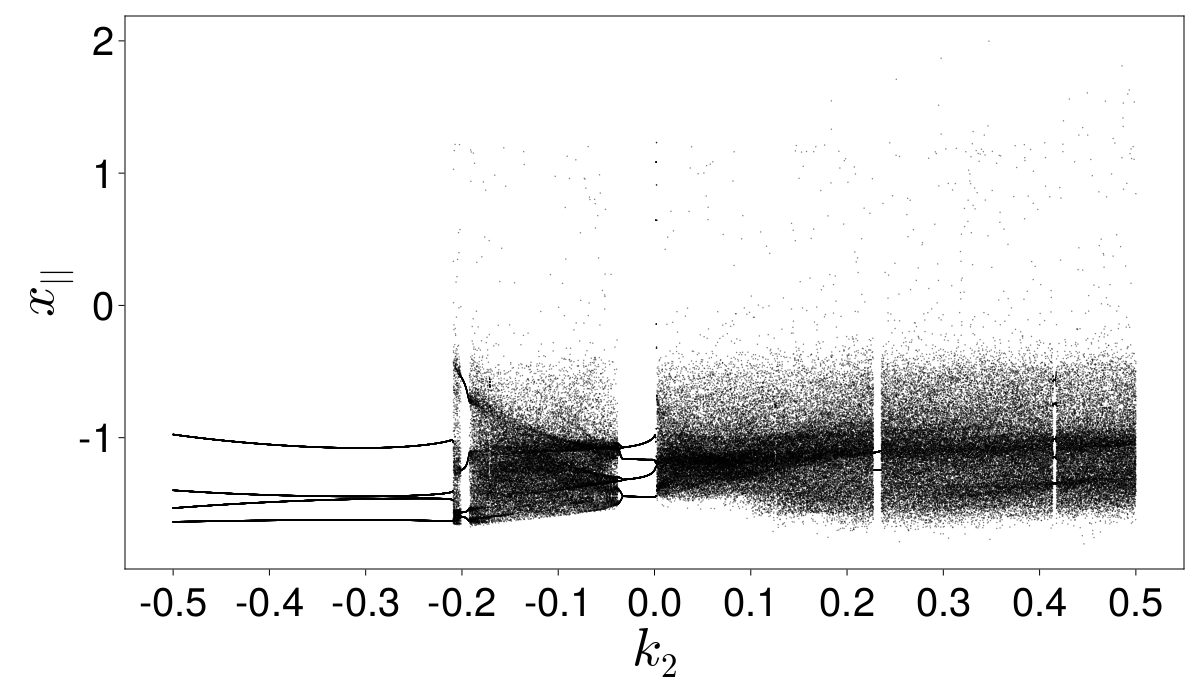

In [21]:
# L2
fig = Figure(resolution = (1200, 700))

ax = Axis(fig[1,1]; xlabel = L"k_{2}", ylabel = L"x_{||}",
xlabelsize = 55, ylabelsize = 55,
xticklabelsize = 40, yticklabelsize = 40  )


ax.xticks = ticks

ax.xgridvisible = false
ax.ygridvisible = false

for (j, p) in enumerate(pvalues)
    scatter!(ax, fill(p, length(output_summ[j])), output_summ[j];
        color = ("black", 0.5), markersize = 1.5
    )
    
end

fig